## Observations and Insights 

%matplotlib inline

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
combined_data.head(20)



In [ ]:
combined_data.columns

In [ ]:
# Checking the number of mice.

total_mice = combined_data.nunique(axis=0)
total_mice = total_mice["Mouse ID"]
total_mice




In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID', "Timepoint"]), "Mouse ID"]
duplicate


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data =  []
duplicate_data.append(duplicate)
duplicate_data


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] != "g989"]
clean_df.head()

In [ ]:
# Checking the number of mice in the clean DataFrame.
clean_df.nunique()

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [330]:
stats_sum = []

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
stats_sum.append(mean)

median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
stats_sum.append(median)

var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stats_sum.append(var)

std = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stats_sum.append(std)

sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
stats_sum.append(sem)

sum_table = pd.DataFrame(stats_sum)
sum_table


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Tumor Volume (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Tumor Volume (mm3),24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Tumor Volume (mm3),4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Tumor Volume (mm3),0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [331]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats_table = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [348]:
mice_per_drug = mouse_metadata[["Drug Regimen", "Mouse ID"]]
# mice_per_drug = mice_per_drug.set_index("Drug Regimen")
drug_data = pd.DataFrame(mice_per_drug)
drug_data_g = drug_data.groupby(["Drug Regimen"]).count()
drug_data_g = drug_data_g.rename(columns={"Mouse ID": "Mice Count"})

drug_data_g.head()


,Mice Count
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25


# 

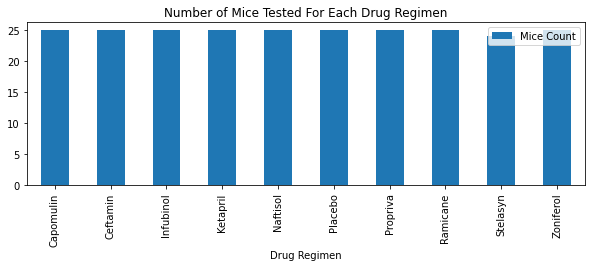

<Figure size 432x288 with 0 Axes>

In [349]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data_g.plot(kind='bar', figsize=(10,3), title="Number of Mice Tested For Each Drug Regimen")

plt.show()
plt.tight_layout()

In [350]:
mice_drugs = clean_df[['Mouse ID', "Drug Regimen"]]
mice_drugs
mice_count = mice_drugs.groupby(["Drug Regimen"])
output = mice_count.nunique()["Mouse ID"]
output   


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [14]:
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
         'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']    

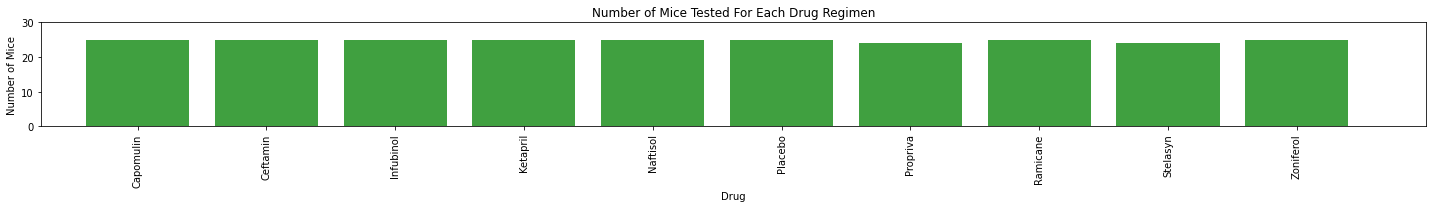

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = range(len(output))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, output, color='green', alpha=0.75, align='center')
plt.xticks(tick_locations, drugs, rotation='vertical')

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(output)+5)

plt.title("Number of Mice Tested For Each Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Number of Mice")

plt.tight_layout()


In [460]:
mice_gender = mouse_metadata[["Sex", "Mouse ID"]]
gender_data = pd.DataFrame(mice_gender, columns={"Mouse ID", "Sex"})
gender_data_out = gender_data.groupby(["Sex"]).count()
gender_data_out = gender_data_out.rename(columns={"Mouse ID": "Mice Count", "Sex": "Gender"})
gender_data_out





SyntaxError: positional argument follows keyword argument (<ipython-input-460-f5801566f59a>, line 4)

In [365]:
labels = ["Male", "Female"]
sizes = [124, 125]
colors = ["blue", "pink"]
explode = (0.1, 0)


In [469]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender_data_out.plot((gender_data_out["Gender"]), style="list", kind='pie')
plt.title("Number of Male vs Female Mice")


plt.show()


KeyError: 'Gender'

TypeError: 'str' object is not callable

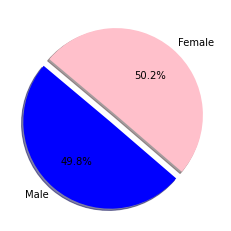

In [470]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Number of Male vs Female Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [471]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor = clean_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']]
final_tumor.head(30)


# final_tumor_data = pd.DataFrame(final_tumor)
# final_tumor_data.head()
# # final_tumor = pd.DataFrame(final_tumor_data)
# final_tumor.head()


# final_tumor_vol = clean_df.loc['Drug Regimen'] == "Capomulin"
# final_tumor_vol = 


capomulin_data = []
ramicane_data = []
infubinal_data = []
ceftamin_data = []
final_vol = []
max_timepoint = []


max_timepoint = clean_df.groupby(["Mouse ID"][0]).max()["Timepoint"]
max_timepoint.append(max_timepoint)

final_vol = clean_df.groupby(["Mouse ID"][0]).max()["Tumor Volume (mm3)"]
final_vol.append(final_vol)


    
ramicane_data = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
ramicane_data.append(ramicane_data)

capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_data.append(capomulin_data)
      
infubinal_data = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
infubinal_data.append(infubinal_data)

ceftamin_data = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
ceftamin_data.append(ceftamin_data)


# (infubinal_data, ceftamin_data)

# 'Mouse ID', 'Drug Regimen'
# drug_data



# final_drug_data = pd.DataFrame([drug_data], index='Mouse ID')
# final_drug_data                                
                                
# final_vol_data = pd.DataFrame(final_vol)
# final_vol_data  

# max_timepoint_data = pd.DataFrame(max_timepoint)
# max_timepoint_data                                  
            

final_tumor_data = pd.merge(final_tumor, max_timepoint_data, on='Mouse ID')
final_tumor_data




    
# drug_data_all = pd.DataFrame(drug_data)
# drug_data_all

# final_tumor_data = pd.DataFrame({"Drug Regimen": final_drug_data, "Last Timepoint": max_timepoint_data, "Tumor Volume (mm3)": final_vol_data}, index='Mouse ID')
# final_tumor_data.head()


# drug_data4.set_index('Mouse ID')







# drug_data1 = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Ramicane"]
# drug_data.append(drug_data1)
    
# drug_data2 = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Capomulin"]
# drug_data.append(drug_data2)
    
# drug_data3 = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Infubinol"]
# drug_data.append(drug_data3)
    
# drug_data4 = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Ceftamin"]
# drug_data.append(drug_data4)
    
# final_tumor = {'drug_data'}




    




# final_tumor_data = pd.DataFrame({"Drug Regimen": drug_data, "Last Timepoint": max_timepoint, "Tumor Volume (mm3)": final_vol)
# final_tumor_data.head()

# max_vol = max_tumor[['Tumor Volume (mm3)']]


# tumor_volume = pd.merge(final_tumor, max_timepoint, on='Mouse ID', how='outer')
# tumor_volume.head(50)

# tumor_max = tumor_volume.loc[['']]

# max_vol = tumor_volume.loc[tumor_volume["Timepoint_x"] == ["Timepoint_y"], :]
# max_vol

# for index, row in tumor_volume.iterrows():
    
    

# for timepoint in max_tumor:
#     max_vol = tumor_volume.loc['Tumor Volume (mm3)']

# for mouse in tumor_volume:
#     if (["Timepoint_y"] == ["Timepoint_x"]) then
#         max_vol_data = ['Tumor Volume (mm3)']
#         max_vol.append(max_vol_data)
    
                
 
# (tumor_volume["Drug Regimen"] == "Ramicane")]



# tumor_final
        

# Start by getting the last (greatest) timepoint for each mouse

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint_x,Timepoint_y
0,k403,Ramicane,45.000000,0,45
1,k403,Ramicane,38.825898,5,45
2,k403,Ramicane,35.014271,10,45
3,k403,Ramicane,34.223992,15,45
4,k403,Ramicane,32.997729,20,45
...,...,...,...,...,...
1875,z969,Naftisol,63.145652,25,45
1876,z969,Naftisol,65.841013,30,45
1877,z969,Naftisol,69.176246,35,45
1878,z969,Naftisol,70.314904,40,45


In [279]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [280]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

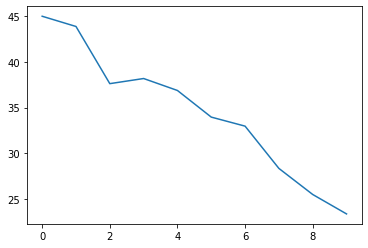

In [490]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_one = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
capomulin_one = pd.DataFrame(capomulin_one)

x_axis = range(len(capomulin_one['Timepoint']))


plt.plot(x_axis, capomulin_one['Tumor Volume (mm3)'])
plt.show()


In [491]:
plt.xlabel=("Time Point")
plt.ylabel=('Tumor Volume (mm3)')
plt.show()

In [473]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = capomulin_data

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
